In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [36]:
# what to do:
# knn svm logistic random_forest 
# us / not us 


In [264]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [265]:
# consolidating income col values
y[y['income'] == '<=50K.'] = '<=50K'
y[y['income'] == '>50K.'] = '>50K'
y['income'] = y['income'].apply(lambda x: 1 if x == '<=50K' else 0)

/var/folders/t0/08jdm81x5hl2xjtdyy2hjzmh0000gn/T/ipykernel_7331/3281958407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y['income'] == '<=50K.'] = '<=50K'
/var/folders/t0/08jdm81x5hl2xjtdyy2hjzmh0000gn/T/ipykernel_7331/3281958407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y['income'] == '<=50K.'] = '<=50K'
/var/folders/t0/08jdm81x5hl2xjtdyy2hjzmh0000gn/T/ipykernel_7331/3281958407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

#### Missing Values

In [266]:
# finds all rows that has a "?" or missing values, then filters dataframe to get rows that do not have those values
cols = X.columns
has = ~(X['age'] == X['age'])
for col in cols:
    has = ((has) | (X[col] =='?') | (X[col].isna()))

X = X[~has]
y = y[~has]
X['native-country'] = X['native-country'] == 'United-States'
X

/var/folders/t0/08jdm81x5hl2xjtdyy2hjzmh0000gn/T/ipykernel_7331/3855884752.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['native-country'] = X['native-country'] == 'United-States'


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,True
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,True
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,True
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,True


In [275]:
X['native-country'].mean()

0.9130953960461722

In [40]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Logistic Regression Model

In [41]:
preproc = ColumnTransformer(
    transformers = [
        ("categorical", OneHotEncoder(handle_unknown='ignore', sparse_output = False), ["race", "sex", "occupation"]),
        ("numerical", "passthrough", ["age", "hours-per-week", "education-num"])
    ],
    remainder = "drop"
)

In [42]:
plr = Pipeline([
    ("preproc", preproc),
    ("model", LogisticRegression())
])

plr.fit(X_train, y_train)

/Users/calwinli/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/calwinli/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['race', 'sex',
                                                   'occupation']),
                                                 ('numerical', 'passthrough',
                                                  ['age', 'hours-per-week',
                                                   'education-num'])])),
                ('model', LogisticRegression())])

In [43]:
predicted = plr.predict(X_test)

In [44]:
# accuracy
(pd.Series(predicted) == y_test.reset_index()['income']).mean()

0.8078425591508808

In [45]:
# recall
recall_score(y_test, predicted)

0.9368193858530364

In [46]:
# f1 score
f1_score(y_test, predicted)

0.8798894263994471

In [49]:
# AUC-ROC
roc_auc_score(y_test, predicted)

0.6775086852205312

# Support Vector Machine

In [675]:
preproc = ColumnTransformer(
    transformers = [
        ("categorical", OneHotEncoder(min_frequency=50, handle_unknown='ignore', sparse_output = False), ["race", "sex", "occupation"]),
        ("numerical", "passthrough", ["age", "hours-per-week", "education-num"])
    ],
    remainder = "drop"
)

In [51]:
plr = Pipeline([
    ("preproc", preproc),
    ("model", SVC())
])

plr.fit(X_train, y_train)

/Users/calwinli/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['race', 'sex',
                                                   'occupation']),
                                                 ('numerical', 'passthrough',
                                                  ['age', 'hours-per-week',
                                                   'education-num'])])),
                ('model', SVC())])

In [52]:
predicted = plr.predict(X_test)

In [53]:
# accuracy
(pd.Series(predicted) == y_test.reset_index()['income']).mean()

0.8019458981351809

In [54]:
# recall
recall_score(y_test, predicted)

0.9600706367114686

In [55]:
# f1 score
f1_score(y_test, predicted)

0.8792847836830047

In [56]:
# AUC-ROC
roc_auc_score(y_test, predicted)

0.6421574286106246

# Random Forrest

In [57]:
preproc = ColumnTransformer(
    transformers = [
        ("categorical", OneHotEncoder(min_frequency=50, handle_unknown='ignore', sparse_output = False), ["race", "sex", "occupation"]),
        ("numerical", "passthrough", ["age", "hours-per-week", "education-num"])
    ],
    remainder = "drop"
)

In [83]:
plr = Pipeline([
    ("preproc", preproc),
    ("model", RandomForestClassifier(max_depth=10, random_state=0))
])

plr.fit(X_train, y_train)

/Users/calwinli/miniforge3/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['race', 'sex',
                                                   'occupation']),
                                                 ('numerical', 'passthrough',
                                                  ['age', 'hours-per-week',
                                                   'education-num'])])),
                ('model',
                 RandomForestClassifier(max_depth=10, random_state=0))])

In [84]:
predicted = plr.predict(X_test)

In [85]:
# accuracy
(pd.Series(predicted) == y_test.reset_index()['income']).mean()

0.8127810127515295

In [86]:
# recall
recall_score(y_test, predicted)

0.9508486216030609

In [87]:
# f1 score
f1_score(y_test, predicted)

0.8841452289728152

In [88]:
# AUC-ROC
roc_auc_score(y_test, predicted)

0.6732607067707066

In [648]:
pre = ColumnTransformer(
    transformers = [
        ("categorical", OneHotEncoder((min_frequency=50, handle_unknown='ignore', sparse_output = False), ["race", "sex", "occupation"]),
        ("numerical", "passthrough", ["age", "hours-per-week", "education-num"])
    ],
    remainder = "drop"
)

# LightGBM

In [650]:
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [667]:
categorical = ["race", "sex", "occupation", "workclass", "marital-status", "relationship", "native-country"]
preproc = ColumnTransformer(
    transformers = [
        ("categorical", OneHotEncoder(min_frequency=50, handle_unknown='ignore', sparse_output = True), categorical),
        ("numerical", "passthrough", ["age", "hours-per-week", "education-num", "fnlwgt", "capital-gain", "capital-loss" ])
    ],
    remainder = "drop"
)

In [668]:
m = LGBMClassifier(max_depth = -1, learning_rate = .01, n_estimators = 1000, n_jobs = -1)
plr = Pipeline([
    ("preproc", preproc),
    ("model", m)
])
plr.fit(X_train, y_train)

/Users/calwinli/miniforge3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/calwinli/miniforge3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 23845, number of negative: 7810
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 31655, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.753278 -> initscore=1.116170
[LightGBM] [Info] Start training from score 1.116170


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                min_frequency=50),
                                                  ['race', 'sex', 'occupation',
                                                   'workclass',
                                                   'marital-status',
                                                   'relationship',
                                                   'native-country']),
                                                 ('numerical', 'passthrough',
                                                  ['age', 'hours-per-week',
                                                   'education-num', 'fnlwgt',
                                                   'capital-gain',
                                                   'capital-loss'])])),
                ('model',
                 LGBMClassifier(learning_rate=0.01, n_estimators=1000,
                                n_jobs=-1))])

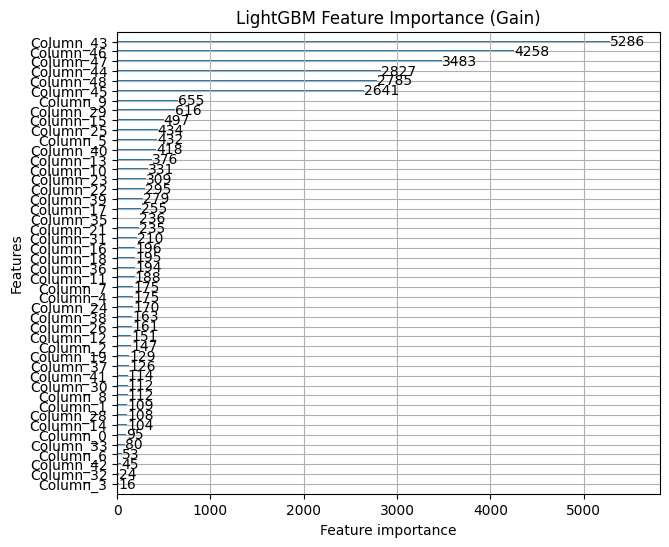

In [669]:
lgb.plot_importance(m, importance_type="split", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()

In [670]:
predicted = plr.predict(X_test)

/Users/calwinli/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [671]:
# accuracy
(pd.Series(predicted) == y_test.reset_index()['income']).mean()

0.8695363750276406

In [672]:
# recall
recall_score(y_test, predicted)

0.9417838528862228

In [673]:
# f1 score
f1_score(y_test, predicted)

0.9154081437583635

In [674]:
# AUC-ROC
roc_auc_score(y_test, predicted)

0.7975546692329878

In [481]:
#gridsearch cv
from sklearn.model_selection import GridSearchCV
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }
grid_search = GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(preproc.fit_transform(X_train), y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


/Users/calwinli/miniforge3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/calwinli/miniforge3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/calwinli/miniforge3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/calwinli/miniforge3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vect

KeyboardInterrupt: 

# XGBOOST

In [608]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [630]:
plr = Pipeline([
    ("preproc", preproc),
    ("model", XGBClassifier())
])
plr.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['race', 'sex', 'occupation',
                                                   'workclass',
                                                   'marital-status',
                                                   'relationship',
                                                   'native-country']),
                                                 ('numerical', 'passthrough',
                                                  ['age', 'hours-per-week',
                                                   'education-num', 'fnlwgt',
                                                   'capital-gain',
                                                   'capital-loss'])])),
                ('model',
                 XGBClassifier(base_score=No...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [631]:
predicted = plr.predict(X_test)

In [632]:
# accuracy
(pd.Series(predicted) == y_test.reset_index()['income']).mean()

0.8649664627404732

In [633]:
# recall
recall_score(y_test, predicted)

0.9323993337905359

In [634]:
# f1 score
f1_score(y_test, predicted)

0.9122016677849133

In [635]:
# AUC-ROC
roc_auc_score(y_test, predicted)

0.7962591907047918

# Ensemble

In [569]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [570]:
plr_XGBOOST = Pipeline([
    ("preproc", preproc),
    ("model", XGBClassifier(max_depth = 7, learning_rate = .01, n_estimators = 1000, n_jobs = -1))
])
plr_XGBOOST.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['race', 'sex', 'occupation',
                                                   'workclass',
                                                   'marital-status',
                                                   'relationship',
                                                   'native-country']),
                                                 ('numerical', 'passthrough',
                                                  ['age', 'hours-per-week',
                                                   'education-num', 'fnlwgt',
                                                   'capital-gain',
                                                   'capital-loss'])])),
                ('model',
                 XGBClassifier(base_score=No...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=-1,
                               num_parallel_tree=None, random_state=None, ...))])

In [571]:
plr_LGBM = Pipeline([
    ("preproc", preproc),
    ("model", LGBMClassifier(max_depth = -1, learning_rate = .01, n_estimators = 1000, n_jobs = -1))
])
plr_LGBM.fit(X_train, y_train)

/Users/calwinli/miniforge3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/calwinli/miniforge3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 23904, number of negative: 7751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 31655, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.755141 -> initscore=1.126224
[LightGBM] [Info] Start training from score 1.126224


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['race', 'sex', 'occupation',
                                                   'workclass',
                                                   'marital-status',
                                                   'relationship',
                                                   'native-country']),
                                                 ('numerical', 'passthrough',
                                                  ['age', 'hours-per-week',
                                                   'education-num', 'fnlwgt',
                                                   'capital-gain',
                                                   'capital-loss'])])),
                ('model',
                 LGBMClassifier(learning_rate=0.01, n_estimators=1000,
                                n_jobs=-1))])

In [572]:
def ensemble_predict(model1, model2, weight1, weight2, data):
    ret = []
    pre1 = model1.predict(data)
    pre2 = model2.predict(data)
    for i in range(len(pre1)):
        val = np.random.choice([pre1[i],pre2[i]], p = [weight1,weight2])

        ret.append(val)
    return ret    
    

In [573]:
predicted = ensemble_predict(plr_LGBM, plr_XGBOOST, .9, .1, X_test)

/Users/calwinli/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [574]:
# accuracy
(pd.Series(predicted) == y_test.reset_index()['income']).mean()

0.8689467089260706

In [575]:
# recall
recall_score(y_test, predicted)

0.9433234421364985

In [576]:
# f1 score
f1_score(y_test, predicted)

0.9147323997698062

In [577]:
# AUC-ROC
roc_auc_score(y_test, predicted)

0.797377659743401

# feature importance

In [681]:
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=['Pclass'])


In [682]:
m = LGBMClassifier(max_depth = -1, learning_rate = .01, n_estimators = 1000, n_jobs = -1)
m.fit(train_data)
lgb.plot_importance(m, importance_type="split", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()

TypeError: LGBMClassifier.fit() missing 1 required positional argument: 'y'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
31010,18,Private,225859,Some-college,10,Never-married,Transport-moving,Own-child,White,Male,2907,0,30,True
44109,36,Private,64874,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,True
20208,33,Self-emp-inc,144949,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,65,True
21642,46,Private,96552,Some-college,10,Divorced,Machine-op-inspct,Own-child,White,Female,0,0,17,True
21020,31,Private,219619,HS-grad,9,Never-married,Sales,Other-relative,White,Male,0,0,48,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,33,Private,198660,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,99999,0,56,True
9741,27,Private,275110,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,80,True
10547,36,Private,144154,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,True
40752,32,Private,96016,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,True
